# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

1.836367273454691 0.9649428073671704
1.840368073614723 0.9638850365702444
1.844368873774755 0.9628118374625972
1.848369673934787 0.9617232272222623
1.852370474094819 0.9606192232739493
1.856371274254851 0.9594998432887656
1.860372074414883 0.9583651051839333
1.864372874574915 0.9572150271225022
1.868373674734947 0.9560496275130596
1.872374474894979 0.9548689250094351
1.8763752750550111 0.9536729385104024
1.880376075215043 0.9524616871593764
1.884376875375075 0.9512351903441073
1.888377675535107 0.9499934676963698
1.892378475695139 0.9487365390916493
1.896379275855171 0.9474644246488234
1.900380076015203 0.9461771447298398
1.904380876175235 0.944874719939391
1.908381676335267 0.9435571711245837
1.912382476495299 0.9422245193746057
1.916383276655331 0.9408767860203882
1.920384076815363 0.9395139926342639
1.924384876975395 0.9381361610296227
1.928385677135427 0.9367433132605614
1.932386477295459 0.9353354716215316
1.936387277455491 0.9339126586469823
1.9403880776155231 0.9324748971109994



4.208841768353671 -0.8758764202392163
4.212842568513703 -0.8777999333380946
4.216843368673735 -0.8797093960371755
4.220844168833767 -0.8816047777728723
4.224844968993799 -0.8834860482069836
4.228845769153831 -0.885353177227179
4.232846569313863 -0.8872061349474807
4.236847369473895 -0.8890448917087423
4.240848169633927 -0.8908694180791232
4.244848969793959 -0.8926796848545602
4.248849769953991 -0.8944756630592342
4.252850570114023 -0.8962573239460345
4.256851370274055 -0.898024638997019
4.260852170434087 -0.8997775799238703
4.264852970594119 -0.9015161186683489
4.268853770754151 -0.9032402274027421
4.272854570914183 -0.9049498785303092
4.276855371074215 -0.9066450446857236
4.280856171234247 -0.9083256987355108
4.284856971394279 -0.9099918137784825
4.288857771554311 -0.911643363146167
4.292858571714343 -0.9132803204032369
4.296859371874375 -0.9149026593479312
4.300860172034407 -0.9165103540124754
4.304860972194439 -0.9181033786634968
4.308861772354471 -0.9196817078024365
4.312862572514

6.7133426685337065 0.41701383334843645
6.7173434686937386 0.42064681402846277
6.721344268853771 0.42427306167549816
6.725345069013803 0.4278925182464427
6.729345869173835 0.43150512580689704
6.733346669333867 0.4351108265320898
6.737347469493899 0.4387095627078029
6.741348269653931 0.4423012767312956
6.745349069813963 0.44588591111222625
6.749349869973995 0.4494634084735728
6.753350670134027 0.45303371155255096
6.757351470294059 0.4565967632015309
6.761352270454091 0.460152506388952
6.765353070614123 0.46370088420023553
6.769353870774155 0.4672418398386958
6.773354670934187 0.4707753166264494
6.777355471094219 0.4743012580053221
6.781356271254251 0.47781960753775415
6.785357071414283 0.4813303089077042
6.789357871574315 0.4848333059215499
6.793358671734347 0.48832854250898794
6.797359471894379 0.49181596272393135
6.801360272054411 0.49529551074540495
6.805361072214443 0.4987671308784389
6.809361872374475 0.5022307675549601
6.813362672534507 0.5056863653346818
6.817363472694539 0.509133

0.07483795239617111
9.353870774154831 0.07084778334711817
9.357871574314863 0.06685648028148243
9.361872374474896 0.06286410708557973
9.365873174634928 0.0588707276628548
9.36987397479496 0.054876405932858474
9.373874774954992 0.050881205830224464
9.377875575115024 0.04688519130364607
9.381876375275056 0.04288842631485257
9.385877175435088 0.03889097483758542
9.38987797559512 0.034892900856574274
9.393878775755152 0.030894268366512823
9.397879575915184 0.02689514137103446
9.401880376075216 0.022895583881687828
9.405881176235248 0.01889565991691221
9.40988197639528 0.01489543350101284
9.413882776555312 0.010894968663136094
9.417883576715344 0.006894329436244628
9.421884376875376 0.002893579856092429
9.425885177035408 -0.0011072160398001565
9.42988597719544 -0.005107994213171436
9.433886777355472 -0.00910869062604339
9.437887577515504 -0.013109241241746688
9.441888377675536 -0.017109582025945685
9.445889177835568 -0.021109648947663377
9.4498899779956 -0.025109377980306314
9.4538907781556

-0.8099378540071822
11.62632526505301 -0.8075848460524276
11.630326065213042 -0.8052189115872846
11.634326865373074 -0.8028400884818004
11.638327665533106 -0.800448414812323
11.642328465693138 -0.7980439288608914
11.64632926585317 -0.7956266691146228
11.650330066013202 -0.7931966742650965
11.654330866173234 -0.790753983207735
11.658331666333266 -0.7882986350411811
11.662332466493298 -0.7858306690666716
11.66633326665333 -0.7833501247874096
11.670334066813362 -0.7808570419079305
11.674334866973394 -0.7783514603334677
11.678335667133426 -0.7758334201693136
11.682336467293458 -0.7733029617201771
11.68633726745349 -0.7707601254895394
11.690338067613522 -0.7682049521790049
11.694338867773554 -0.7656374826876499
11.698339667933586 -0.7630577581113682
11.702340468093618 -0.7604658197422134
11.70634126825365 -0.7578617090677371
11.710342068413683 -0.755245467770326
11.714342868573715 -0.7526171377265338
11.718343668733747 -0.7499767610064116
11.722344468893779 -0.7473243798728341
11.7263452690

0.9548265329395338
14.442888577715543 0.9536300016898057
14.446889377875575 0.9524182062753476
14.450890178035607 0.9511911660926179
14.454890978195639 0.9499489007820888
14.458891778355671 0.9486914302279316
14.462892578515703 0.9474187745576985
14.466893378675735 0.9461309541420007
14.470894178835767 0.9448279895941817
14.474894978995799 0.9435099017699878
14.478895779155831 0.9421767117672347
14.482896579315863 0.9408284409254687
14.486897379475895 0.939465110825626
14.490898179635927 0.9380867432896871
14.494898979795959 0.9366933603803274
14.498899779955991 0.9352849844005638
14.502900580116023 0.9338616378933985
14.506901380276055 0.9324233436414572
14.510902180436087 0.9309701246666251
14.51490298059612 0.9295020042296782
14.518903780756151 0.9280190058299109
14.522904580916183 0.92652115320476
14.526905381076215 0.9250084703294247
14.530906181236247 0.9234809814164827
14.53490698139628 0.9219387109155028
14.538907781556311 0.9203816835126537
14.542908581716343 0.918809924130308

16.759351870374076 -0.868113317445902
16.763352670534108 -0.8700922258946603
16.76735347069414 -0.8720572073161198
16.77135427085417 -0.8740082302580401
16.775355071014204 -0.8759452634916054
16.779355871174236 -0.8778682760119247
16.783356671334268 -0.8797772370385278
16.7873574714943 -0.8816721160158578
16.79135827165433 -0.883552882613761
16.795359071814364 -0.8854195067279711
16.799359871974396 -0.8872719584805923
16.803360672134428 -0.8891102082205768
16.80736147229446 -0.8909342265242
16.81136227245449 -0.8927439841955302
16.815363072614524 -0.8945394522668979
16.819363872774556 -0.8963206019993576
16.823364672934588 -0.8980874048831489
16.82736547309462 -0.8998398326381523
16.831366273254652 -0.9015778572143424
16.835367073414684 -0.9033014507922363
16.839367873574716 -0.9050105857833394
16.843368673734748 -0.9067052348305864
16.84736947389478 -0.9083853708087798
16.851370274054812 -0.9100509668250236
16.855371074214844 -0.9117019962191544
16.859371874374876 -0.913338432564167
1

0.17730721898751411
19.031806361272256 0.18124319914919843
19.035807161432288 0.1851762782632614
19.03980796159232 0.18910639337534196
19.043808761752352 0.1930334815785219
19.047809561912384 0.19695748001433291
19.051810362072416 0.20087832587376267
19.055811162232448 0.20479595639826023
19.05981196239248 0.20871030888074046
19.063812762552512 0.21262132066658782
19.067813562712544 0.21652892915465927
19.071814362872576 0.22043307179828625
19.07581516303261 0.22433368610627577
19.07981596319264 0.2282307096439108
19.083816763352672 0.23212408003394946
19.087817563512704 0.2360137349576236
19.091818363672736 0.23989961215563627
19.09581916383277 0.24378164942915811
19.0998199639928 0.2476597846408232
19.103820764152832 0.2515339557157234
19.107821564312864 0.25540410064240215
19.111822364472896 0.2592701574738468
19.11582316463293 0.26313206432848046
19.119823964792957 0.2669897593911489
19.12382476495299 0.27084318091412357
19.12782556511302 0.2746922672180698
19.131826365273053 0.278

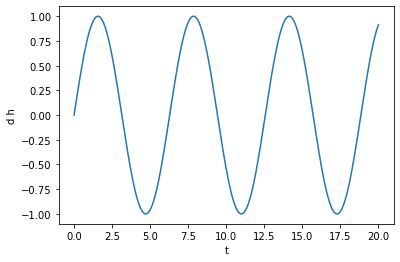

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

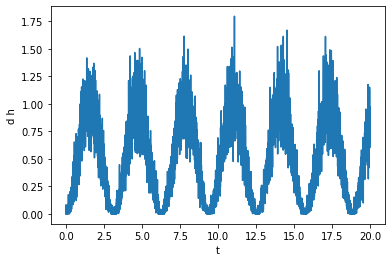

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

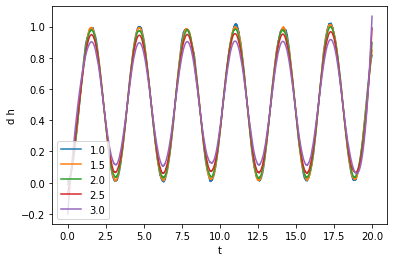

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

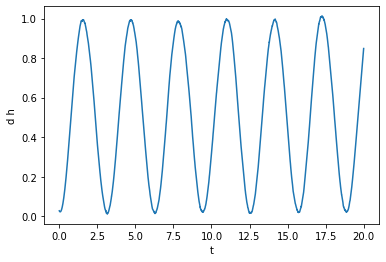

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1838


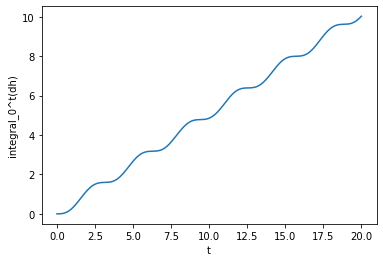

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

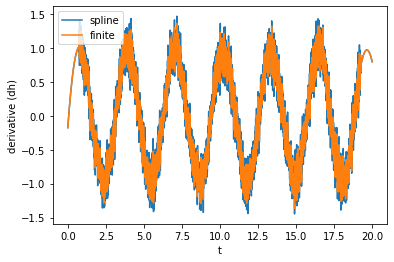

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

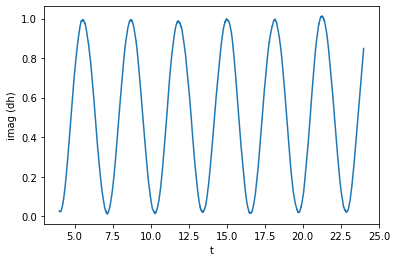

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

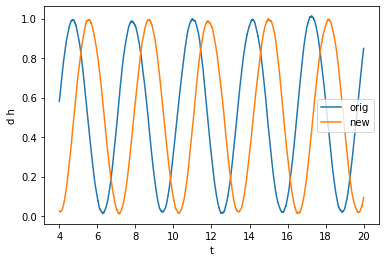

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

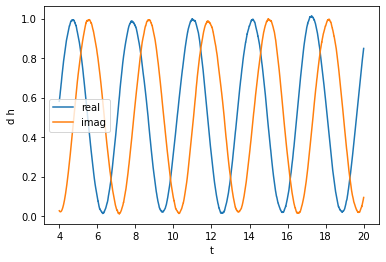

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

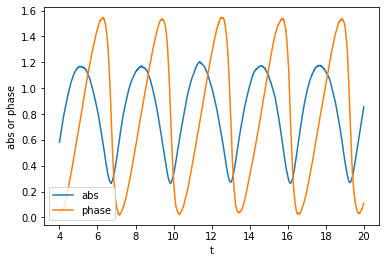

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

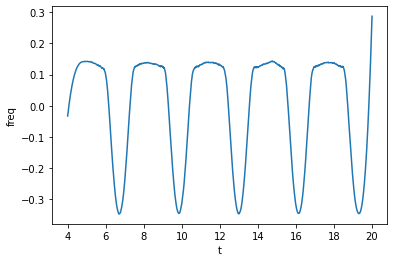

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

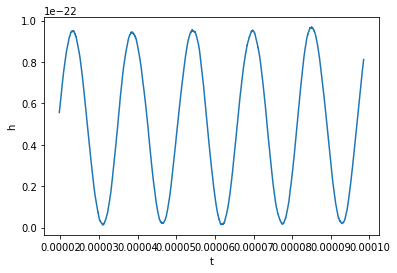

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

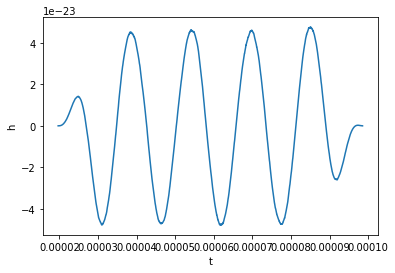

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

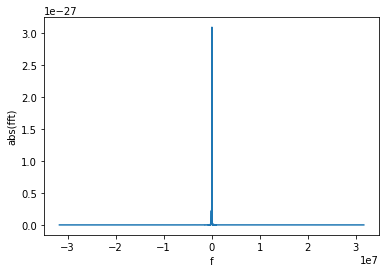

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

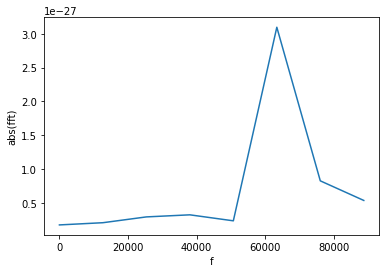

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64162.29


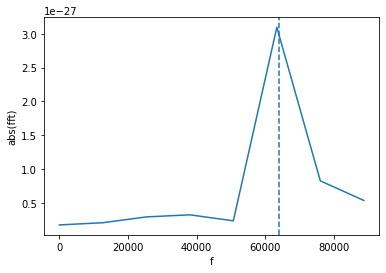

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.098e-27
Maximum with mask 8.237e-28
Length with mask 8
Length after having removed the masked points 7
